In [1]:
# This code looks at using AdaBoosting. 

# AdaBoosing is learning from previous mistakes made. i.e. too far off with regression. 

# https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectFromModel

In [4]:
nutrition = pd.read_pickle("/Users/oscarbond/Documents/GitHub/green-team-repo-2/Random forests/OB - Price/Nutrition_Full_Features.pkl")
#nutrition.drop(nutrition.columns[[]], axis=1, inplace=True) 

# removing the brand, and food type columns for data cleaning. 
nutrition

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq per 100g),...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,1.70,260.0,0.653846,Bread products,0.3482,0.1441,56.7,0.001209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,NaN,NaN,NaN,4864.0,1615.0,NaN,NaN,NaN,NaN,NaN
4,Waffle Plain Frozen Ready-To-Heat Microwave,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,NaN,NaN,NaN,5195.0,2240.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [5]:
nutrition = nutrition.dropna() # dropping NaN values. This ensures random forests can accept data. 
nutrition

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq per 100g),...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,Dutch Apple Pie,Baked Foods,2.80,500.0,0.560000,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,Bread White Wheat,Baked Foods,0.95,800.0,0.118750,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,Bagels Wheat,Baked Foods,1.60,450.0,0.355556,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [6]:
nutrition.dtypes # checking types of data

name                                        object
Food Group                                  object
Price (£)                                  float64
Weight (GRAMS)                             float64
Price per Weight (£/100Gram)               float64
Carbon Group                                object
Land use (m2/100g)                         float64
GHG(kgco2eq/100g)                          float64
Water use (L/100g)                         float64
Acidifying emissions(kgSO2eq per 100g)     float64
Eutr emissions  (kg PO43-eq per 100g)      float64
Calories                                     int64
Fat (g)                                    float64
Protein (g)                                float64
Carbohydrate (g)                           float64
Sugars (g)                                 float64
Fiber (g)                                  float64
Saturated Fats (g)                         float64
Calcium (mg)                                 int64
Iron, Fe (mg)                  

In [7]:
X = nutrition.iloc[:, 11:].astype('float64').dropna() 
# pulling out the features data
X

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)","Potassium, K (mg)",...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,273.0,9.22,6.58,41.05,4.30,2.2,1.898,279.0,6.04,126.0,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,309.0,9.49,7.42,48.39,4.41,2.6,2.275,299.0,6.59,138.0,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,290.0,11.50,2.17,44.54,22.02,1.6,2.313,14.0,0.91,76.0,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,238.0,2.15,10.66,43.91,5.00,9.2,0.630,684.0,4.89,127.0,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,250.0,1.53,10.20,48.89,6.12,4.1,0.000,20.0,2.76,165.0,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,241.0,10.16,1.66,40.60,19.10,2.9,1.507,4.0,0.78,572.0,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,19.0,0.27,1.39,3.78,0.71,3.1,0.053,62.0,0.90,327.0,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,96.0,6.84,5.23,4.32,1.89,1.2,1.486,70.0,1.15,269.0,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,208.0,15.70,1.22,17.17,11.23,2.3,2.452,30.0,0.49,309.0,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [8]:
y = nutrition.iloc[:, 4:5].astype('float64').dropna()
# pulling out the price data
y

,Price per Weight (£/100Gram)
1,0.264550
2,0.264550
5,0.560000
9,0.118750
10,0.355556
...,...
1218,1.058824
1219,0.250000
1220,0.750000
1221,0.041000


In [9]:
# flattening the array for use in the random forest algorithm
y = np.ravel(y)
y

array([0.26455027, 0.26455027, 0.56      , ..., 0.75      , 0.041     ,
       0.17142857])

In [10]:
from sklearn.model_selection import train_test_split
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X,y,test_size=0.5)
# splitting the data into train and test data. 
#size =0.2 means 80% data is training data, 20% testing

In [11]:
# splitting the training data into validation and training data. 
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation,y_train_validation,test_size=0.15)

In [31]:
# Implementing AdaBoostRegressor here

from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(n_estimators=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
# checking the outputs 
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.06601482309875
Mean Squared Error: 100.25295773105496
Root Mean Squared Error: 10.01263989820142


In [13]:
#automatically select features 
sel = SelectFromModel(model)
sel.fit(X_train, y_train)

SelectFromModel(estimator=AdaBoostRegressor(n_estimators=100))

In [14]:
#seeing which features are important 
#returns an array of trues when features are more important than mean 
# false when features are less important than mean importance 
sel.get_support()

# make a list and count selected features 

selected_feat = X_train.columns[(sel.get_support())]
#return the number of features selected by the random forest 
len(selected_feat)

9

In [15]:
#get the name of feautures selected 
print(selected_feat)

Index(['Fiber (g)', 'Iron, Fe (mg)', 'Magnesium (mg)', 'Water (g)',
       'Thiamin (B1) (mg)', 'Vitamin B6 (mg)', 'Retinol (mcg)',
       'Fatty acids, total polyunsaturated (mg)', 'Theobromine (mg)'],
      dtype='object')


In [16]:
Importances_idx = model.feature_importances_.argsort()

Features = X_train.columns[Importances_idx]
Importances = model.feature_importances_[Importances_idx]

In [17]:
Features = Features#[0:10]
Importances = Importances#[0:10]

<BarContainer object of 40 artists>

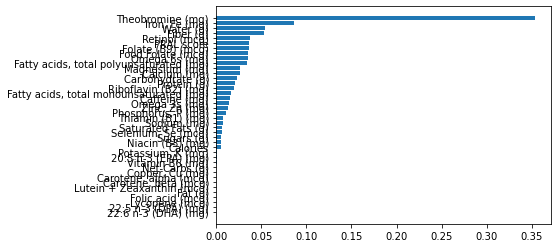

In [18]:
plt.barh(Features, Importances)

In [19]:
# checking the outputs 
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2304747481316527
Mean Squared Error: 100.17263548542915
Root Mean Squared Error: 10.0086280521073


In [20]:
np.mean(y)
np.std(y)

7.118726897222426

In [37]:
Mean_Absolute_Error = []
Mean_Squared_Error = []
Root_Mean_Squared_Error = []

In [38]:
# creating a for loop to evaluate the hyperperameters of the model. Initally with n_estimators
#implementing the random forest here
for i in range (1, 200, 1):
    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor(n_estimators=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    Mean_Absolute_Error.append(mae)
    Mean_Squared_Error.append(mse)
    Root_Mean_Squared_Error.append(rmse)
    
    

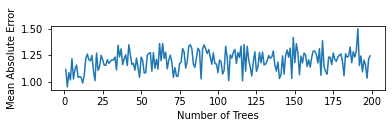

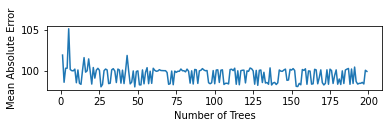

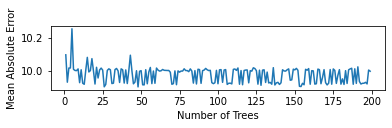

In [39]:
# plotting the different metrics to see the effect of changing the number of trees
import matplotlib.pyplot as plt
n_trees = list(range(1, 200, 1))

f = plt.figure(1)

plt.subplot(311)
plt.plot(n_trees, Mean_Absolute_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()
plt.subplot(312)
plt.plot(n_trees, Mean_Squared_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()
plt.subplot(313)
plt.plot(n_trees, Root_Mean_Squared_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()


In [ ]:
# Summary: Not the best. Not enough data to be able to do what we want. 
# There is a lot of noise displayed when the number of trees is greater. This is becuase 
# each tree will be getting a minimal amount of data. Therefore, those that have high error and so 
# are given a greater weight will still be causing the error. 

# Unsure as to why there is the large amount of noise in the data. 
